<a href="https://colab.research.google.com/github/SatoruGojo9/24f1002697_git_challenge_lab/blob/main/PROJECT_3_CNN_(Convolutional_Neural_Network)_Image_Classification_%E2%80%93_Real_World_Object_Detection_Fashion_MNIST_Dataset_SHREESH_GURURAJ_KULKARNI_(25_AIML_A6_DEC_8336).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SECTION 1: IMPORT LIBRARIES AND SETUP

# Purpose: Import all necessary libraries for CNN and image processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# --- GPU Configuration ---
try:
    # Check for GPU availability
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        # Configure GPU memory growth to prevent TensorFlow from allocating all memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✓ GPUs available: {len(gpus)}")
        print("✓ TensorFlow set to use GPU with memory growth")
    else:
        print("✗ No GPU devices found. TensorFlow will run on CPU.")
except RuntimeError as e:
    # Handle GPU errors
    print(f"✗ Error configuring GPU: {e}")
    print("✗ TensorFlow will run on CPU.")
# --------------------------

print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ Keras version: {keras.__version__}")
print("✓ All libraries imported successfully")

✓ GPUs available: 1
✓ TensorFlow set to use GPU with memory growth
✓ TensorFlow version: 2.19.0
✓ Keras version: 3.10.0
✓ All libraries imported successfully


## SECTION 2: LOAD AND EXPLORE DATASET

# Purpose: Load MNIST - Fashion dataset and perform exploratory analysis

In [3]:
# Assuming you have 'fashion-mnist_train.csv' and 'fashion-mnist_test.csv' in your Colab files.
# You might need to upload these files if they are not already there.
import pandas as pd

print("\n" + "="*70)
print("LOADING FASHION MNIST DATASET from CSV")
print("="*70)

try:
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')

    # Separate features (X) and labels (y)
    X_train_flat = train_df.drop('label', axis=1).values
    y_train = train_df['label'].values
    X_test_flat = test_df.drop('label', axis=1).values
    y_test = test_df['label'].values

    # Reshape the images to 28x28 pixels and add a channel dimension for grayscale
    X_train = X_train_flat.reshape(-1, 28, 28, 1)
    X_test = X_test_flat.reshape(-1, 28, 28, 1)

    print("✓ Fashion MNIST dataset loaded successfully from CSV files")
    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    print(f"Test labels shape: {y_test.shape}")

    # Define class names for Fashion MNIST
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    print(f"\nNumber of classes: {len(class_names)}")
    print(f"Class names: {class_names}")

    # Dataset information
    print("\n" + "="*70)
    print("DATASET INFORMATION")
    print("="*70)
    print(f"Image dimensions: {X_train.shape[1]} x {X_train.shape[2]} pixels")
    print(f"Color channels: {X_train.shape[3]} (Grayscale)")
    print(f"Pixel value range: {X_train.min()} to {X_train.max()}")
    print(f"Data type: {X_train.dtype}")

    # Class distribution
    unique, counts = np.unique(y_train, return_counts=True)
    print("\nTraining set class distribution:")
    for cls, count in zip(unique, counts):
        print(f"  {class_names[cls]}: {count} images ({count/len(y_train)*100:.1f}%)")

except FileNotFoundError:
    print("✗ Error: Fashion MNIST CSV files not found. Please ensure 'fashion-mnist_train.csv' and 'fashion-mnist_test.csv' are uploaded to your Colab environment.")
except Exception as e:
    print(f"✗ An unexpected error occurred: {e}")


LOADING FASHION MNIST DATASET from CSV
✓ Fashion MNIST dataset loaded successfully from CSV files

Training set shape: (1887, 28, 28, 1)
Training labels shape: (1887,)
Test set shape: (1886, 28, 28, 1)
Test labels shape: (1886,)

Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

DATASET INFORMATION
Image dimensions: 28 x 28 pixels
Color channels: 1 (Grayscale)
Pixel value range: nan to nan
Data type: float64

Training set class distribution:
  T-shirt/top: 205 images (10.9%)
  Trouser: 181 images (9.6%)
  Pullover: 202 images (10.7%)
  Dress: 198 images (10.5%)
  Coat: 205 images (10.9%)
  Sandal: 173 images (9.2%)
  Shirt: 197 images (10.4%)
  Sneaker: 183 images (9.7%)
  Bag: 175 images (9.3%)
  Ankle boot: 168 images (8.9%)


## SECTION 3: VISUALIZE SAMPLE IMAGES

# Purpose: Display sample images from each class


VISUALIZING SAMPLE IMAGES


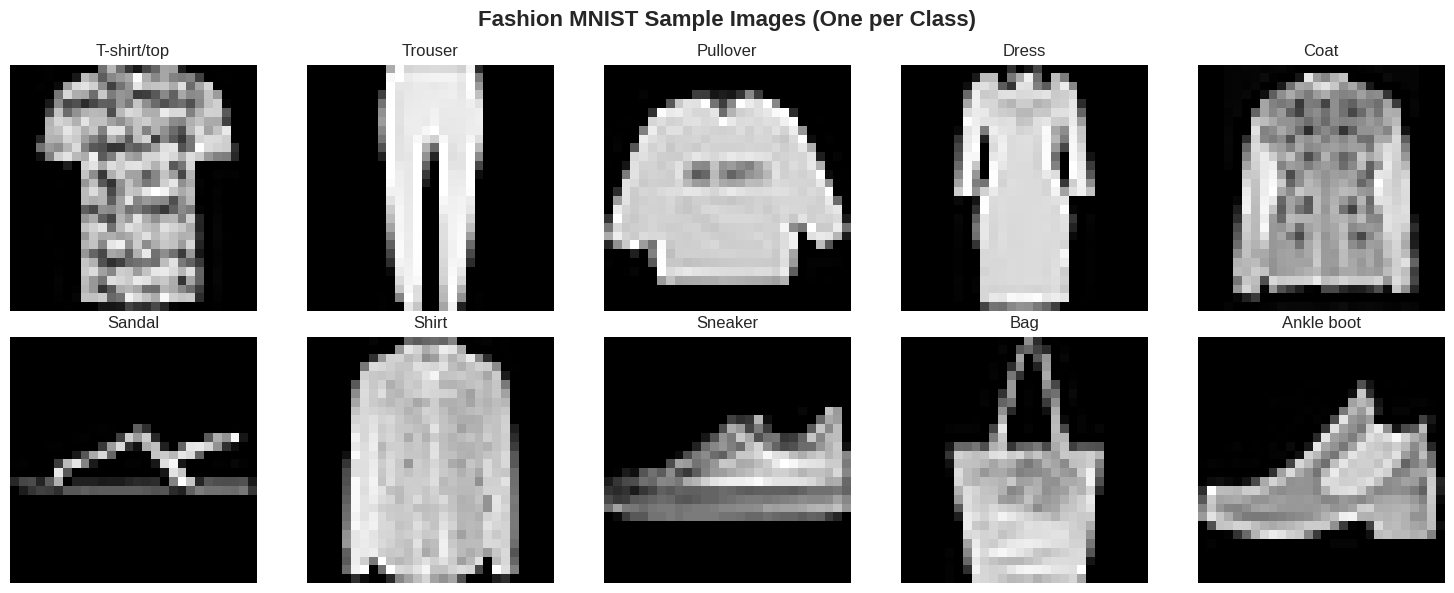

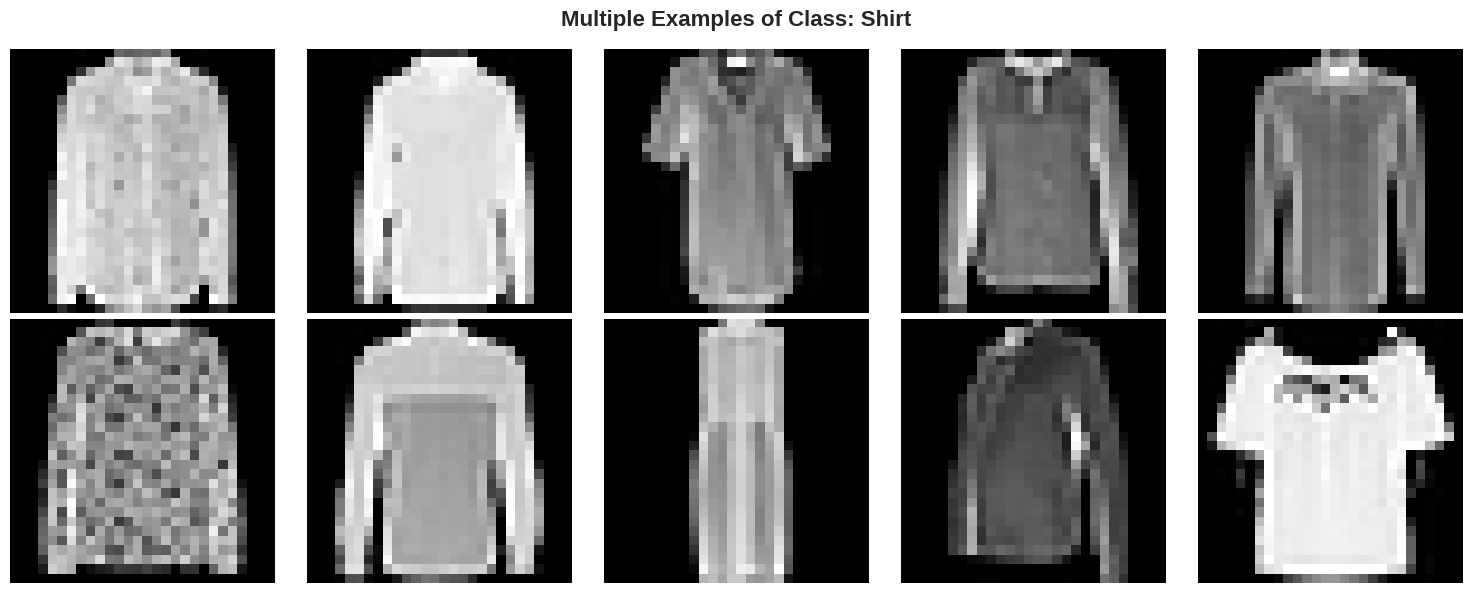

✓ Sample images visualized


In [5]:
import os

print("\n" + "="*70)
print("VISUALIZING SAMPLE IMAGES")
print("="*70)

# Create the output directory if it doesn't exist
output_dir = '/mnt/user-data/outputs/'
os.makedirs(output_dir, exist_ok=True)

# Display sample images from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Fashion MNIST Sample Images (One per Class)', fontsize=16, fontweight='bold')

for i, class_name in enumerate(class_names):
    # Find first image of this class
    # The labels are flat, so direct comparison `y_train == i` works.
    idx = np.where(y_train == i)[0][0]

    row = i // 5
    col = i % 5
    # Remove the last dimension (channel) for grayscale images for correct display
    axes[row, col].imshow(X_train[idx].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(class_name, fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'fashion_mnist_sample_images.png'), dpi=150, bbox_inches='tight')
plt.show()

# Display multiple images from random class
sample_class = np.random.randint(0, 10)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle(f'Multiple Examples of Class: {class_names[sample_class]}',
             fontsize=16, fontweight='bold')

class_indices = np.where(y_train == sample_class)[0][:10]
for i, idx in enumerate(class_indices):
    row = i // 5
    col = i % 5
    # Remove the last dimension (channel) for grayscale images for correct display
    axes[row, col].imshow(X_train[idx].reshape(28, 28), cmap='gray')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("✓ Sample images visualized")

## SECTION 4: DATA PREPROCESSING

# Purpose: Normalize pixel values and prepare labels

In [6]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Handle NaN values in X_train and X_test by filling with 0 (common for image data)
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)
print("✓ NaN values in image data filled with 0")

# Normalize pixel values to [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print("✓ Pixel values normalized to [0, 1]")
print(f"  Before: [{X_train.min():.0f}, {X_train.max():.0f}] (original type: {X_train.dtype})")
print(f"  After: [{X_train_normalized.min():.2f}, {X_train_normalized.max():.2f}] (normalized type: {X_train_normalized.dtype})")

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

print(f"\n✓ Labels converted to one-hot encoding")
print(f"  Original label shape: {y_train.shape}")
print(f"  One-hot label shape: {y_train_categorical.shape}")
print(f"  Example - Label {y_train[0]} → {y_train_categorical[0]}")

# Create validation set (10% of training data)
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_normalized, y_train_categorical,
    test_size=0.1, random_state=42, stratify=y_train
)

print(f"\n✓ Data split completed:")
print(f"  Training samples: {len(X_train_final)} ({len(X_train_final)/len(X_train)*100:.1f}%)")
print(f"  Validation samples: {len(X_val)} ({len(X_val)/len(X_train)*100:.1f}%)")
print(f"  Test samples: {len(X_test)}")


DATA PREPROCESSING
✓ NaN values in image data filled with 0
✓ Pixel values normalized to [0, 1]
  Before: [0, 255] (original type: float64)
  After: [0.00, 1.00] (normalized type: float32)

✓ Labels converted to one-hot encoding
  Original label shape: (1887,)
  One-hot label shape: (1887, 10)
  Example - Label 2 → [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

✓ Data split completed:
  Training samples: 1698 (90.0%)
  Validation samples: 189 (10.0%)
  Test samples: 1886


## SECTION 5: BUILD CNN ARCHITECTURE

# Purpose: Design convolutional neural network with Conv, Pooling, and FC layers

In [7]:
print("\n" + "="*70)
print("CNN MODEL ARCHITECTURE")
print("="*70)

def create_cnn_model(input_shape=(28, 28, 1), num_classes=10):
    """
    Create a Convolutional Neural Network

    Architecture:
    - 3 Convolutional blocks (Conv2D + Conv2D + MaxPooling + Dropout)
    - Flatten layer
    - 2 Fully Connected layers with dropout
    - Output layer
    """
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same',
               input_shape=input_shape, name='Conv_Block1_Conv1'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv_Block1_Conv2'),
        BatchNormalization(),
        MaxPooling2D((2, 2), name='Conv_Block1_Pool'),
        Dropout(0.25, name='Conv_Block1_Dropout'),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_Block2_Conv1'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_Block2_Conv2'),
        BatchNormalization(),
        MaxPooling2D((2, 2), name='Conv_Block2_Pool'),
        Dropout(0.25, name='Conv_Block2_Dropout'),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv_Block3_Conv1'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv_Block3_Conv2'),
        BatchNormalization(),
        MaxPooling2D((2, 2), name='Conv_Block3_Pool'),
        Dropout(0.25, name='Conv_Block3_Dropout'),

        # Flatten and Fully Connected Layers
        Flatten(name='Flatten'),
        Dense(512, activation='relu', name='FC1'),
        BatchNormalization(),
        Dropout(0.5, name='FC1_Dropout'),
        Dense(256, activation='relu', name='FC2'),
        BatchNormalization(),
        Dropout(0.5, name='FC2_Dropout'),

        # Output Layer
        Dense(num_classes, activation='softmax', name='Output')
    ])

    return model

# Create the model
model = create_cnn_model(input_shape=(28, 28, 1), num_classes=10)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

print("✓ CNN model created and compiled successfully")
print("\nModel Architecture:")
print("="*70)
print(model.summary())


CNN MODEL ARCHITECTURE
✓ CNN model created and compiled successfully

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_Block1_Conv1 (Conv2D)      │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block1_Conv2 (Conv2D)      │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block1_Pool (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block1_Dropout (Dropout)   │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block2_Conv1 (Conv2D)      │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block2_Conv2 (Conv2D)      │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block2_Pool (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block2_Dropout (Dropout)   │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block3_Conv1 (Conv2D)      │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block3_Conv2 (Conv2D)      │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block3_Pool (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Block3_Dropout (Dropout)   │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,015,530 (3.87 MB)

 Trainable params: 1,013,098 (3.86 MB)

 Non-trainable params: 2,432 (9.50 KB)

None


## SECTION 6: VISUALIZE MODEL ARCHITECTURE

# Purpose: Create visual representation of CNN architecture


MODEL ARCHITECTURE VISUALIZATION
✓ Model architecture diagram saved


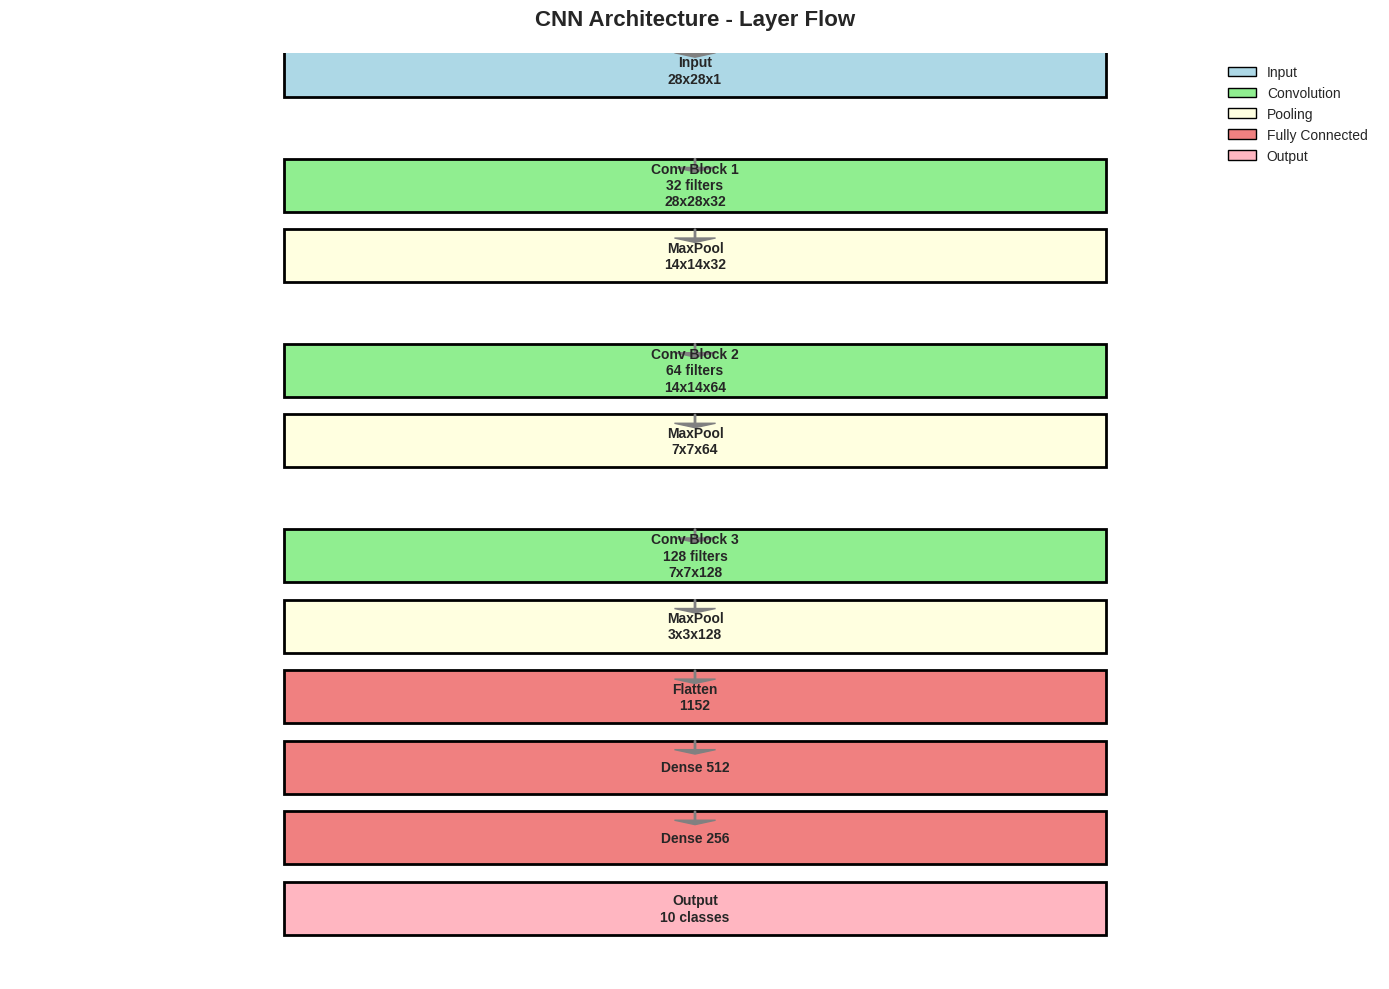

✓ Custom architecture visualization created


In [8]:
print("\n" + "="*70)
print("MODEL ARCHITECTURE VISUALIZATION")
print("="*70)

# Save model architecture diagram
try:
    plot_model(model, to_file='/mnt/user-data/outputs/cnn_architecture.png',
               show_shapes=True, show_layer_names=True, rankdir='TB', dpi=150)
    print("✓ Model architecture diagram saved")
except:
    print("! Could not generate architecture diagram (graphviz not available)")

# Create custom architecture visualization
def visualize_cnn_architecture():
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis('off')

    layers_info = [
        ('Input\n28x28x1', 0.95, 'lightblue'),
        ('Conv Block 1\n32 filters\n28x28x32', 0.82, 'lightgreen'),
        ('MaxPool\n14x14x32', 0.74, 'lightyellow'),
        ('Conv Block 2\n64 filters\n14x14x64', 0.61, 'lightgreen'),
        ('MaxPool\n7x7x64', 0.53, 'lightyellow'),
        ('Conv Block 3\n128 filters\n7x7x128', 0.40, 'lightgreen'),
        ('MaxPool\n3x3x128', 0.32, 'lightyellow'),
        ('Flatten\n1152', 0.24, 'lightcoral'),
        ('Dense 512', 0.16, 'lightcoral'),
        ('Dense 256', 0.08, 'lightcoral'),
        ('Output\n10 classes', 0.00, 'lightpink')
    ]

    for name, y_pos, color in layers_info:
        ax.add_patch(plt.Rectangle((0.2, y_pos), 0.6, 0.06,
                                   facecolor=color, edgecolor='black', linewidth=2))
        ax.text(0.5, y_pos + 0.03, name, ha='center', va='center',
               fontsize=10, fontweight='bold')

        # Draw arrows
        if y_pos > 0:
            ax.arrow(0.5, y_pos + 0.06, 0, -0.01,
                    head_width=0.03, head_length=0.005, fc='gray', ec='gray')

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.05, 1)
    ax.set_title('CNN Architecture - Layer Flow', fontsize=16, fontweight='bold', pad=20)

    # Add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, fc='lightblue', ec='black', label='Input'),
        plt.Rectangle((0,0),1,1, fc='lightgreen', ec='black', label='Convolution'),
        plt.Rectangle((0,0),1,1, fc='lightyellow', ec='black', label='Pooling'),
        plt.Rectangle((0,0),1,1, fc='lightcoral', ec='black', label='Fully Connected'),
        plt.Rectangle((0,0),1,1, fc='lightpink', ec='black', label='Output')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.savefig('/mnt/user-data/outputs/cnn_architecture_custom.png', dpi=150, bbox_inches='tight')
    plt.show()

visualize_cnn_architecture()
print("✓ Custom architecture visualization created")

## SECTION 7: DATA AUGMENTATION

# Purpose: Apply image augmentation to increase training data diversity


DATA AUGMENTATION SETUP
✓ Data augmentation configured
  Augmentation parameters:
  - Rotation: ±15°
  - Width shift: ±10%
  - Height shift: ±10%
  - Horizontal flip: Yes
  - Zoom: ±10%


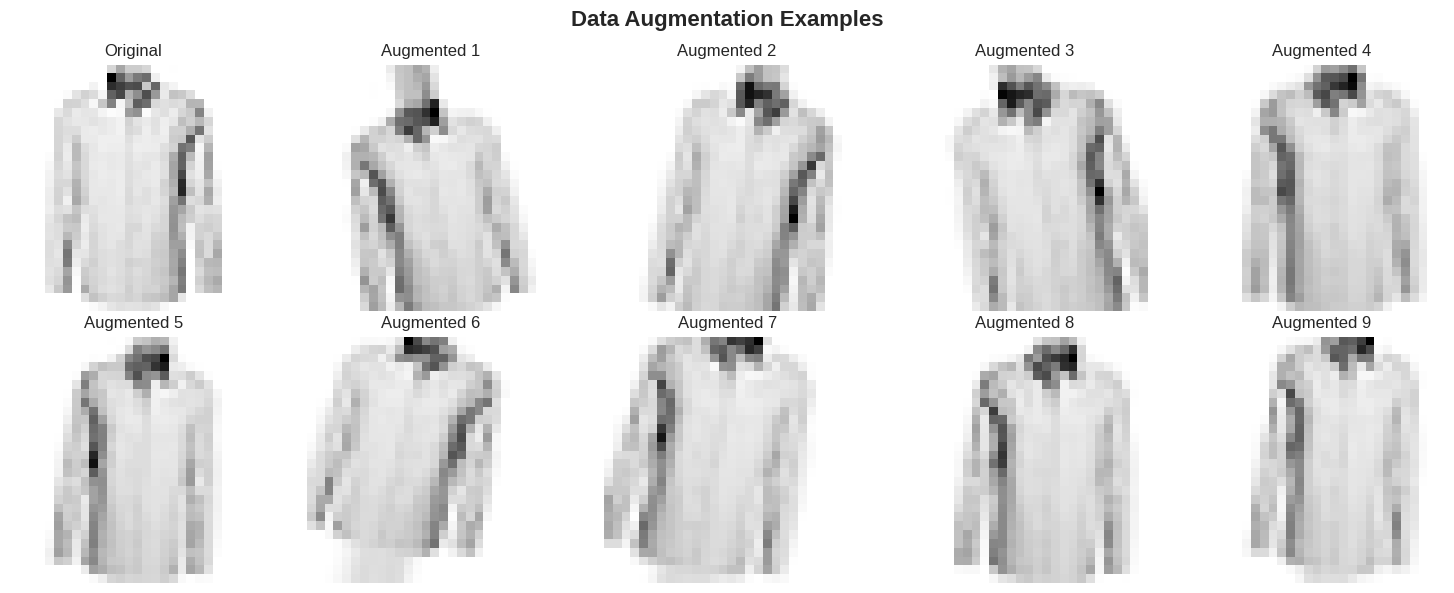

✓ Data augmentation examples visualized


In [11]:
print("\n" + "="*70)
print("DATA AUGMENTATION SETUP")
print("="*70)

# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,          # Randomly rotate images by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10% of total width
    height_shift_range=0.1,     # Randomly shift images vertically by 10% of total height
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1,             # Randomly zoom images by 10%
    fill_mode='nearest'         # Strategy for filling in newly created pixels
)

# Fit the data augmentation generator on the training data
# This computes the required statistics (e.g., mean, std) for transformations
train_datagen.fit(X_train_final)

print("✓ Data augmentation configured")
print("  Augmentation parameters:")
print("  - Rotation: ±15°")
print("  - Width shift: ±10%")
print("  - Height shift: ±10%")
print("  - Horizontal flip: Yes")
print("  - Zoom: ±10%")

# Select a sample image from the training set for visualization
sample_img = X_train_final[0:1]
# Create a figure and a grid of subplots to display original and augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')

# Display the original sample image in the first subplot
axes[0, 0].imshow(sample_img[0])
axes[0, 0].set_title('Original', fontsize=12)
axes[0, 0].axis('off')

# Generate a flow of augmented images from the sample image
augmentation_gen = train_datagen.flow(sample_img, batch_size=1)
# Display 9 augmented versions of the sample image
for i in range(1, 10):
    aug_img = next(augmentation_gen)[0] # Get the next augmented image
    row = i // 5 # Determine the row for the subplot
    col = i % 5  # Determine the column for the subplot
    axes[row, col].imshow(aug_img) # Display the augmented image
    axes[row, col].set_title(f'Augmented {i}', fontsize=12) # Set title for the subplot
    axes[row, col].axis('off') # Turn off axis labels for cleaner display

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/data_augmentation_examples.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Data augmentation examples visualized")

## SECTION 8: TRAIN THE MODEL

# Purpose: Train CNN with augmented data and callbacks

In [12]:
print("\n" + "="*70)
print("MODEL TRAINING")
print("="*70)

# Define the output directory for saving model checkpoints
output_dir = '/mnt/user-data/outputs/'

# Define callbacks for monitoring and controlling model training
callbacks = [
    # EarlyStopping: Stops training when a monitored metric has stopped improving.
    # monitor='val_loss': Monitor the validation loss.
    # patience=10: Number of epochs with no improvement after which training will be stopped.
    # restore_best_weights=True: Restores model weights from the epoch with the best value of the monitored metric.
    # verbose=1: Display messages when callback is activated.
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),

    # ModelCheckpoint: Saves the Keras model or model weights at some frequency.
    # filepath: Path to save the model file.
    # monitor='val_accuracy': Monitor the validation accuracy.
    # save_best_only=True: Only save the model when `val_accuracy` is at its best.
    # verbose=1: Display messages when model is saved.
    ModelCheckpoint(os.path.join(output_dir, 'fashion_mnist_cnn_best_model.keras'),
                    monitor='val_accuracy', save_best_only=True, verbose=1),

    # ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.
    # monitor='val_loss': Monitor the validation loss.
    # factor=0.5: Factor by which the learning rate will be reduced. new_lr = lr * factor.
    # patience=5: Number of epochs with no improvement after which learning rate will be reduced.
    # min_lr=0.00001: Lower bound on the learning rate.
    # verbose=1: Display messages when learning rate is reduced.
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

# Set training parameters
epochs = 50       # Maximum number of epochs to train the model
batch_size = 32   # Number of samples per gradient update

# Train the model using the augmented data generator
history = model.fit(
    # Use train_datagen.flow to continuously generate augmented training data batches
    train_datagen.flow(X_train_final, y_train_final, batch_size=batch_size),
    epochs=epochs,                      # Number of epochs to train for
    validation_data=(X_val, y_val),     # Data to evaluate the loss and any model metrics at the end of each epoch
    callbacks=callbacks,                # List of callbacks to apply during training
    verbose=1                           # Display progress bar during training
)

print("\n✓ Model training completed")


MODEL TRAINING
Epoch 1/50
52/54 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6892 - loss: 0.7954 - top_k_categorical_accuracy: 0.9894
Epoch 1: val_accuracy improved from -inf to 0.71958, saving model to /mnt/user-data/outputs/fashion_mnist_cnn_best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6890 - loss: 0.7962 - top_k_categorical_accuracy: 0.9895 - val_accuracy: 0.7196 - val_loss: 0.6785 - val_top_k_categorical_accuracy: 0.9947 - learning_rate: 6.2500e-05
Epoch 2/50
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6587 - loss: 0.8162 - top_k_categorical_accuracy: 0.9928
Epoch 2: val_accuracy did not improve from 0.71958
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6595 - loss: 0.8159 - top_k_categorical_accuracy: 0.9927 - val_accuracy: 0.7143 - val_loss: 0.6848 - val_top_k_categorical_accuracy: 0.9947 - learning_rate: 6.2500e-05
Epoch 3/50
51/54 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7304 - loss: 0.7310 - top_k_categorical_accuracy: 0.9

## SECTION 9: PLOT TRAINING CURVES

# Purpose: Visualize training and validation accuracy/loss over epochs


TRAINING HISTORY VISUALIZATION


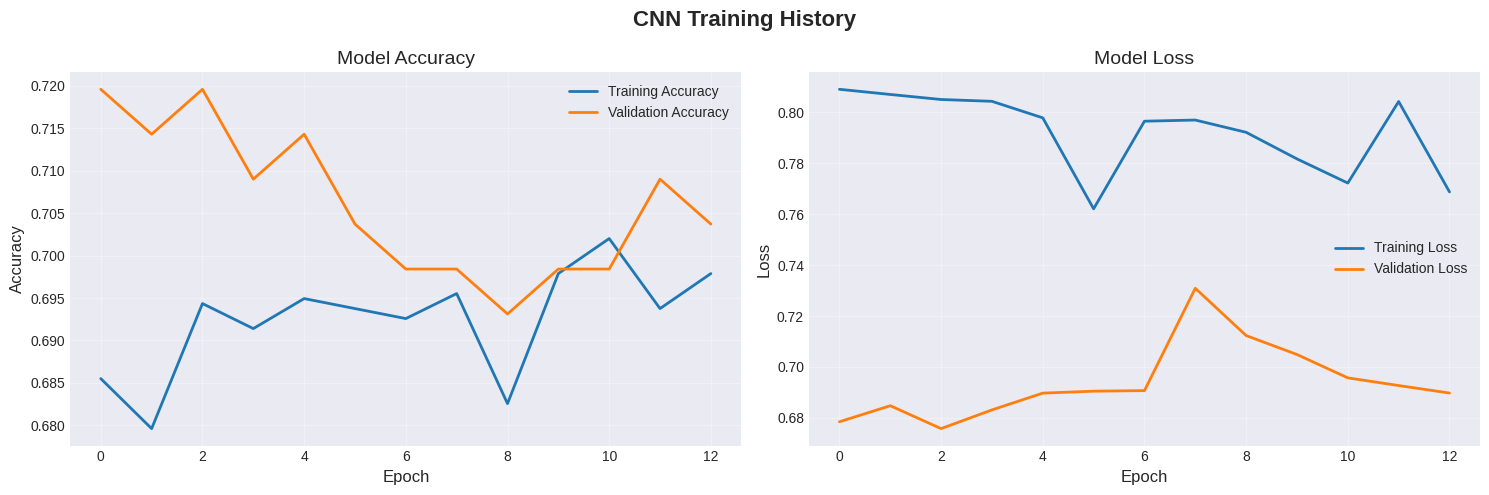

✓ Training curves saved


In [13]:
print("\n" + "="*70)
print("TRAINING HISTORY VISUALIZATION")
print("="*70)

# Plot training curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CNN Training History', fontsize=16, fontweight='bold')

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/cnn_training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Training curves saved")


## SECTION 10: MODEL EVALUATION ON TEST SET

# Purpose: Evaluate model performance on unseen test data

In [14]:
print("\n" + "="*70)
print("MODEL EVALUATION ON TEST SET")
print("="*70)

# Evaluate on test set
test_loss, test_accuracy, test_top5_accuracy = model.evaluate(
    X_test_normalized, y_test_categorical, verbose=0
)

print("Test Set Performance:")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Test Accuracy: {test_accuracy*100:.2f}%")
print(f"  Top-5 Accuracy: {test_top5_accuracy*100:.2f}%")

# Make predictions
y_pred_probs = model.predict(X_test_normalized, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = y_test.flatten()

# Calculate per-class accuracy
print("\n" + "="*70)
print("PER-CLASS PERFORMANCE")
print("="*70)
for i, class_name in enumerate(class_names):
    class_mask = y_test_classes == i
    class_accuracy = accuracy_score(
        y_test_classes[class_mask],
        y_pred_classes[class_mask]
    )
    print(f"  {class_name}: {class_accuracy*100:.2f}%")



MODEL EVALUATION ON TEST SET
Test Set Performance:
  Test Loss: 0.6088
  Test Accuracy: 75.08%
  Top-5 Accuracy: 99.36%

PER-CLASS PERFORMANCE
  T-shirt/top: 82.89%
  Trouser: 94.51%
  Pullover: 70.10%
  Dress: 82.61%
  Coat: 61.29%
  Sandal: 87.23%
  Shirt: 11.88%
  Sneaker: 80.41%
  Bag: 92.09%
  Ankle boot: 93.75%


## SECTION 11: CONFUSION MATRIX

# Purpose: Visualize classification performance across all classes


CONFUSION MATRIX


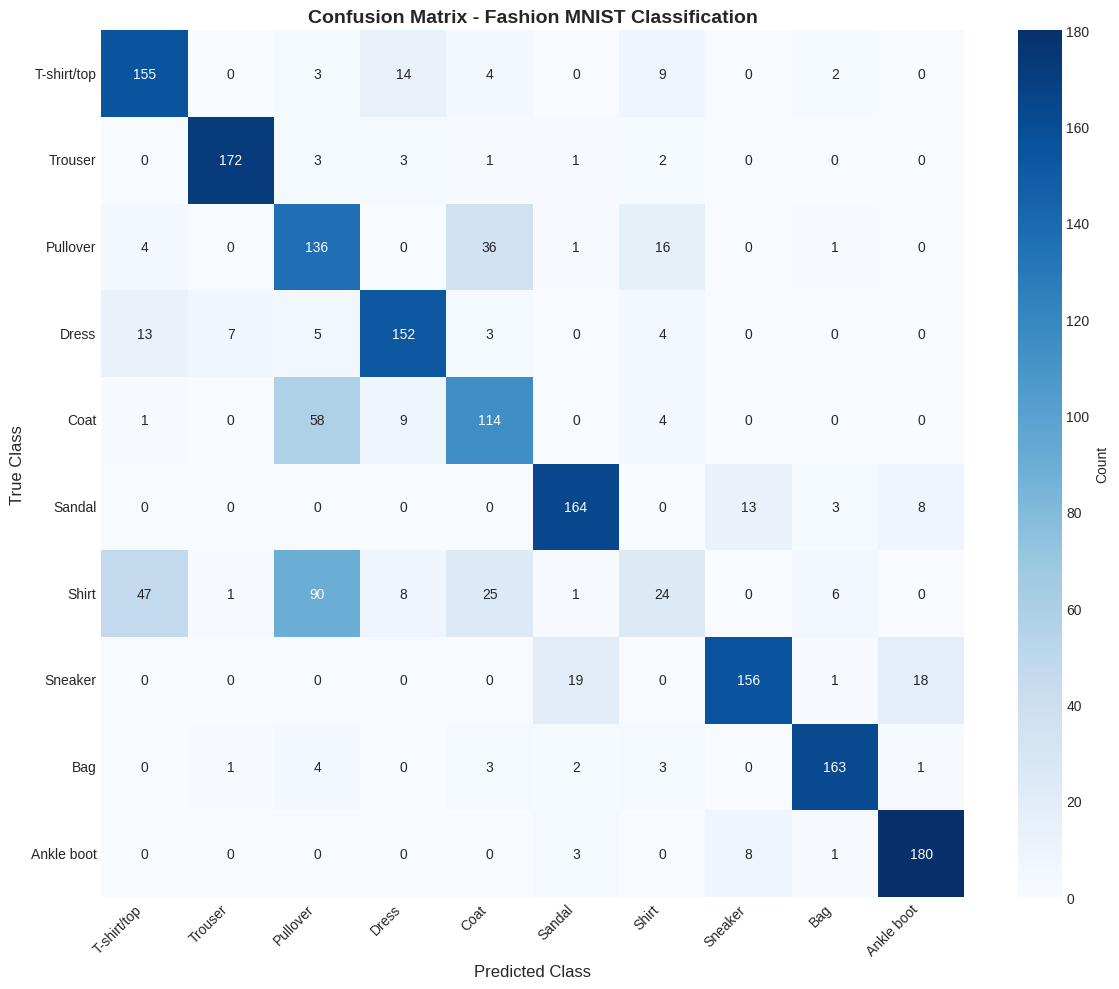


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.70      0.83      0.76       187
     Trouser       0.95      0.95      0.95       182
    Pullover       0.45      0.70      0.55       194
       Dress       0.82      0.83      0.82       184
        Coat       0.61      0.61      0.61       186
      Sandal       0.86      0.87      0.87       188
       Shirt       0.39      0.12      0.18       202
     Sneaker       0.88      0.80      0.84       194
         Bag       0.92      0.92      0.92       177
  Ankle boot       0.87      0.94      0.90       192

    accuracy                           0.75      1886
   macro avg       0.75      0.76      0.74      1886
weighted avg       0.74      0.75      0.73      1886



In [15]:
print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)

# Calculate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix - Fashion MNIST Classification', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

## SECTION 12: VISUALIZE FEATURE MAPS

# Purpose: Visualize learned features from convolutional layers


FEATURE MAP VISUALIZATION
✓ Feature extraction model created successfully


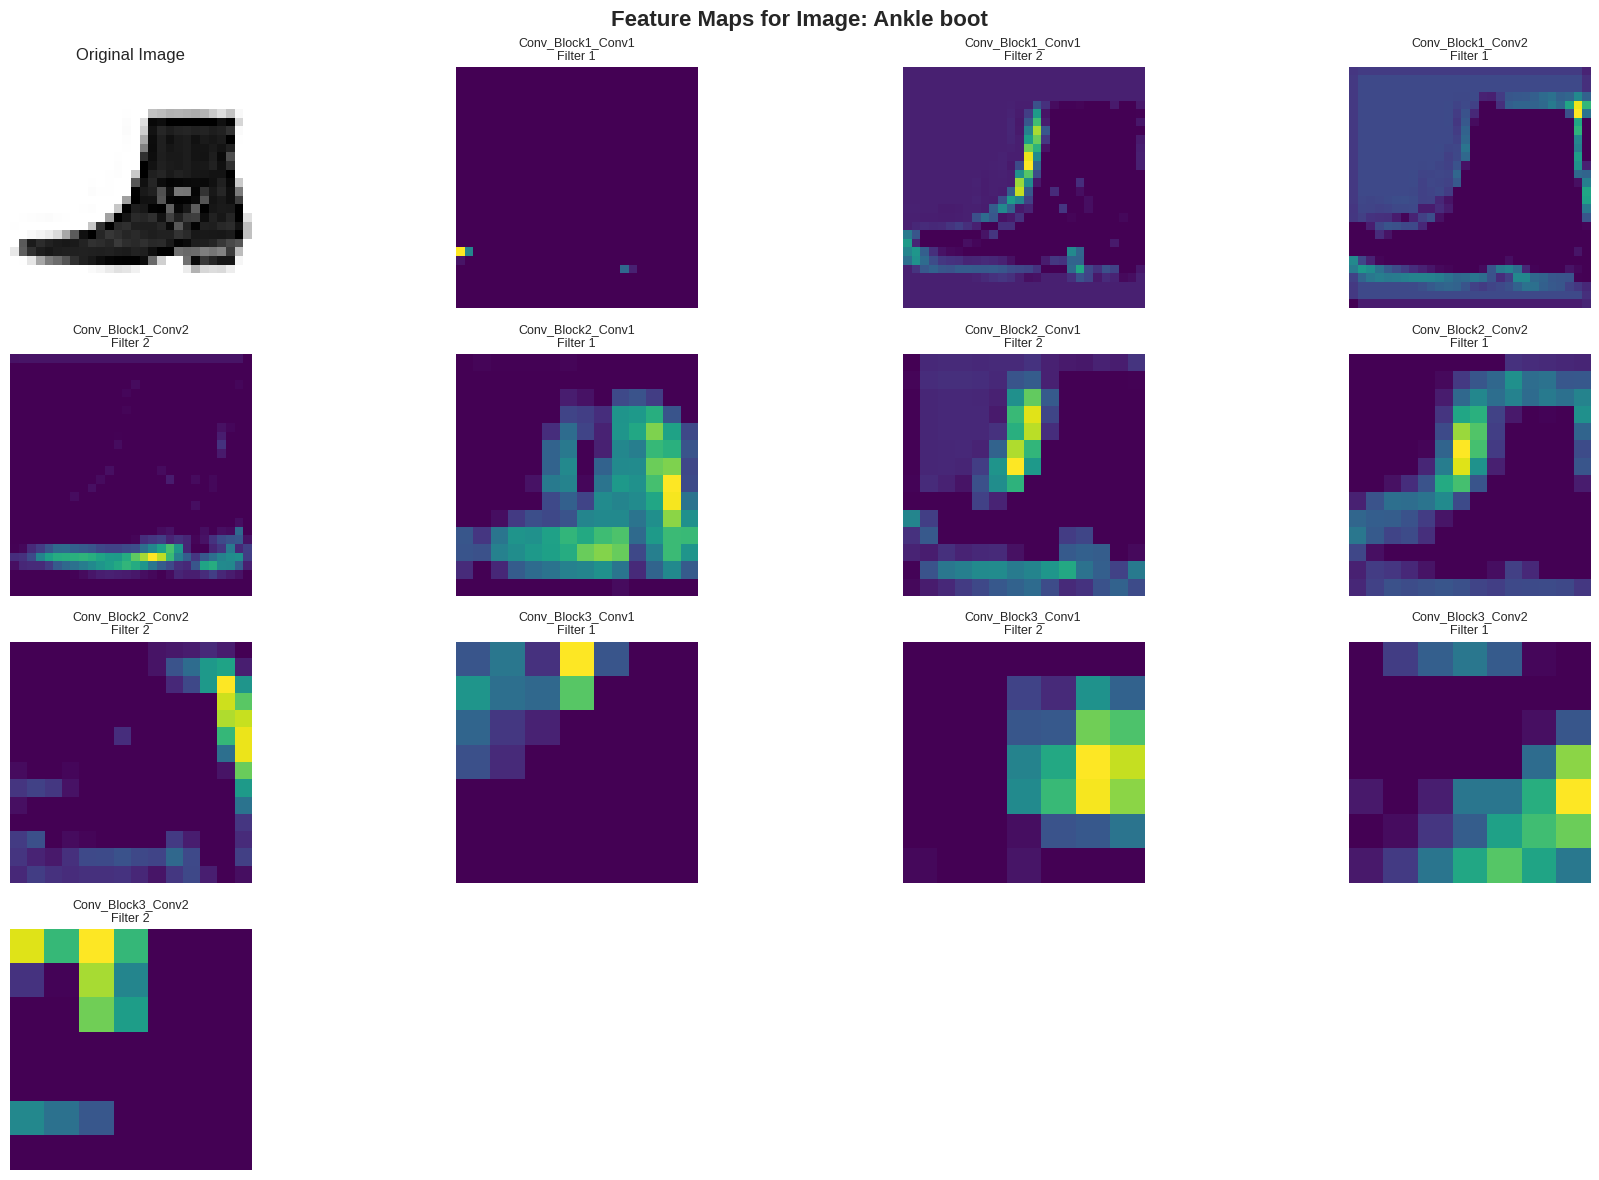

✓ Feature maps visualized


In [18]:
print("\n" + "="*70)
print("FEATURE MAP VISUALIZATION")
print("="*70)

# Create a new Input tensor that matches the original model's input shape
feature_extractor_input = tf.keras.Input(shape=model.input_shape[1:])

# Connect the layers from the original model to this new input
# This implicitly re-uses the weights of the original model
x = feature_extractor_input
feature_outputs = []
conv_layer_count = 0
for layer in model.layers:
    x = layer(x)
    if isinstance(layer, Conv2D):
        feature_outputs.append(x)
        conv_layer_count += 1
        if conv_layer_count == 6:  # Get outputs of first 6 Conv2D layers
            break

# Create the feature extraction model
feature_map_model = tf.keras.Model(inputs=feature_extractor_input, outputs=feature_outputs)
print("✓ Feature extraction model created successfully")

# Select a sample image
sample_idx = np.random.randint(0, len(X_test_normalized))
sample_image = X_test_normalized[sample_idx:sample_idx+1]
sample_label = class_names[y_test_classes[sample_idx]]

# Get feature maps
feature_maps = feature_map_model.predict(sample_image, verbose=0)

# Visualize feature maps
fig = plt.figure(figsize=(18, 12))
fig.suptitle(f'Feature Maps for Image: {sample_label}', fontsize=16, fontweight='bold')

# Display original image
ax = plt.subplot(4, 4, 1)
ax.imshow(sample_image[0])
ax.set_title('Original Image', fontsize=12)
ax.axis('off')

# Display feature maps from different layers
# We get layer names from the original model's Conv2D layers for labeling
layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)][:conv_layer_count]
for i, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
    n_features = feature_map.shape[-1]

    # Display first 2 feature maps from each layer
    for j in range(min(2, n_features)):
        ax = plt.subplot(4, 4, (i * 2) + j + 2)
        ax.imshow(feature_map[0, :, :, j], cmap='viridis')
        ax.set_title(f'{layer_name}\nFilter {j+1}', fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/feature_maps.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Feature maps visualized")

## SECTION 13: VISUALIZE MISCLASSIFIED IMAGES

# Purpose: Analyze and visualize incorrectly classified images


MISCLASSIFIED IMAGES ANALYSIS
Total misclassified images: 470
Misclassification rate: 24.92%


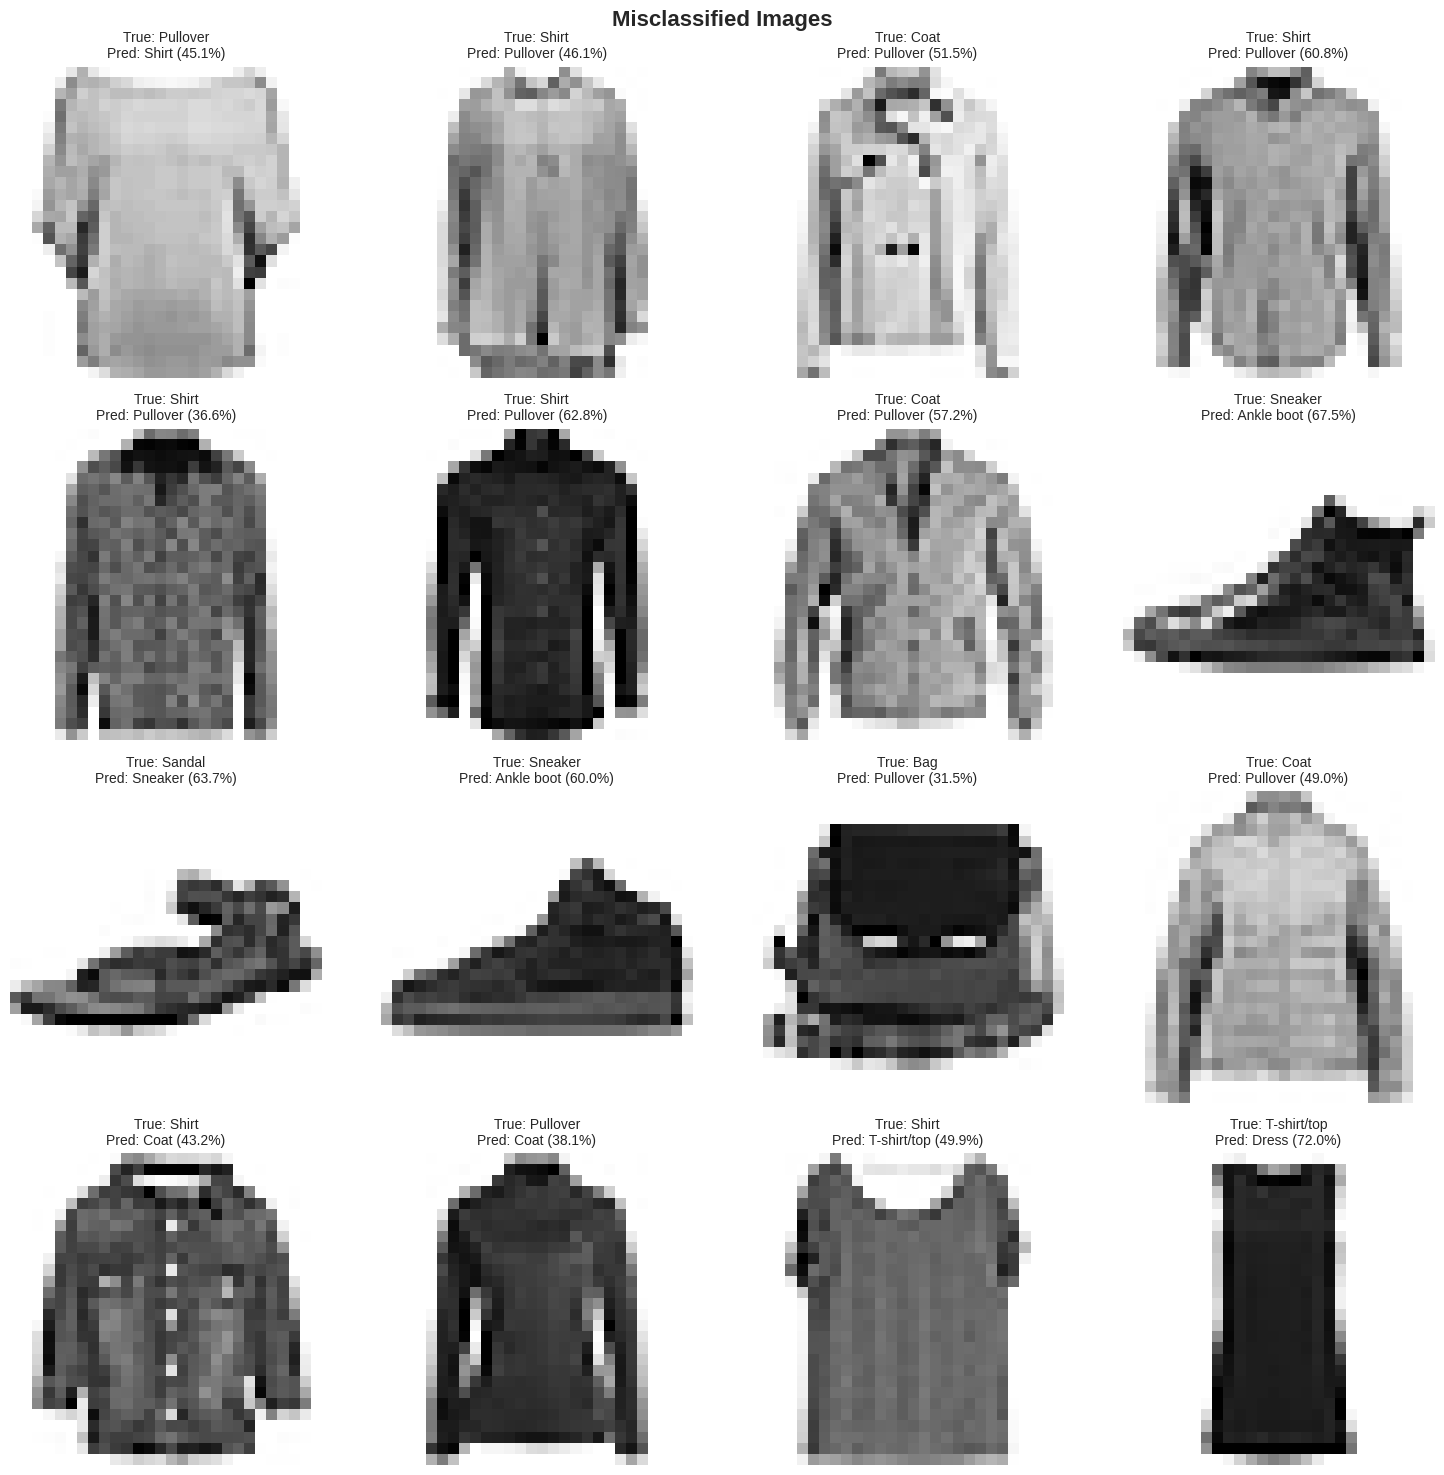

✓ Misclassified images visualized


In [19]:
print("\n" + "="*70)
print("MISCLASSIFIED IMAGES ANALYSIS")
print("="*70)

misclassified_indices = np.where(y_pred_classes != y_test_classes)[0]
print(f"Total misclassified images: {len(misclassified_indices)}")
print(f"Misclassification rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

n_display = min(16, len(misclassified_indices))
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle('Misclassified Images', fontsize=16, fontweight='bold')

for i in range(n_display):
    idx = misclassified_indices[i]
    row = i // 4
    col = i % 4

    axes[row, col].imshow(X_test[idx])
    true_label = class_names[y_test_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred_probs[idx][y_pred_classes[idx]] * 100

    axes[row, col].set_title(f'True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)',
                            fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/misclassified_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Misclassified images visualized")


SAMPLE PREDICTIONS


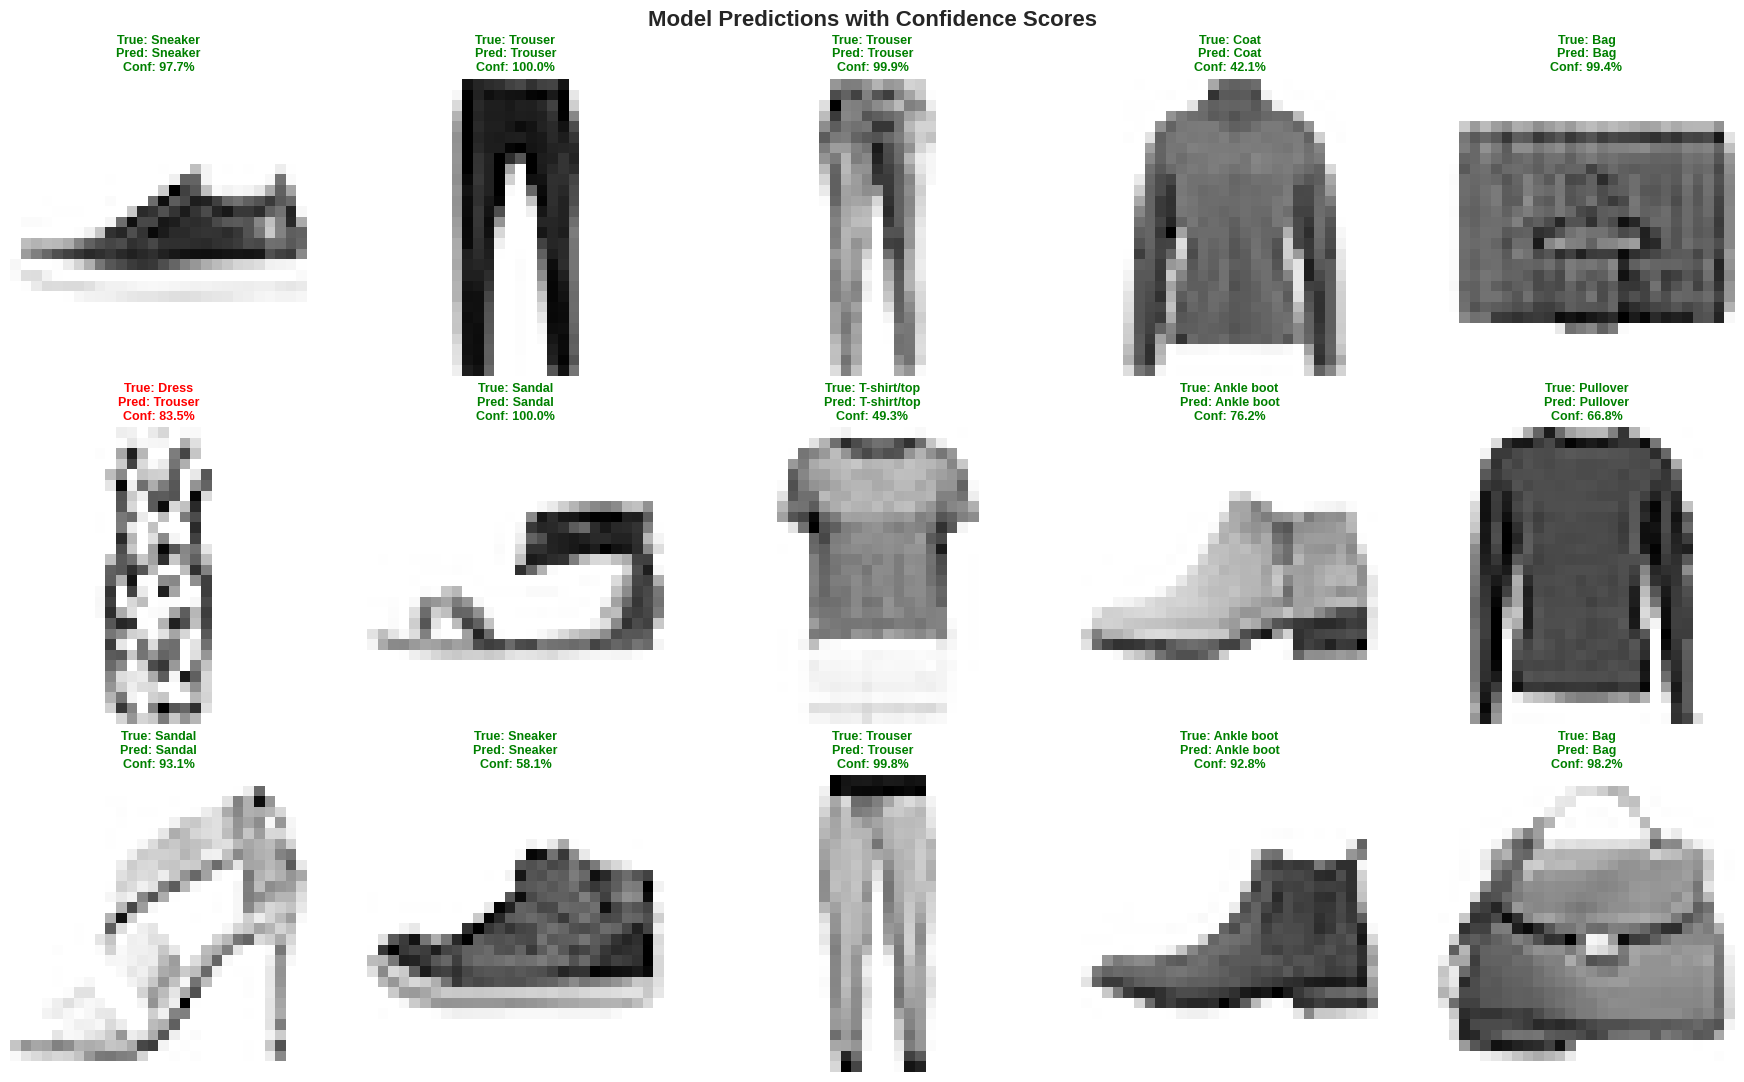

✓ Sample predictions visualized


In [20]:
print("\n" + "="*70)
print("SAMPLE PREDICTIONS")
print("="*70)

# Display random predictions
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.suptitle('Model Predictions with Confidence Scores', fontsize=16, fontweight='bold')

for i in range(15):
    idx = np.random.randint(0, len(X_test))
    row = i // 5
    col = i % 5

    axes[row, col].imshow(X_test[idx])

    true_label = class_names[y_test_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred_probs[idx][y_pred_classes[idx]] * 100

    # Color code: Green for correct, Red for incorrect
    color = 'green' if true_label == pred_label else 'red'

    axes[row, col].set_title(
        f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
        fontsize=9, color=color, fontweight='bold'
    )
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/sample_predictions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Sample predictions visualized")

## SECTION 14: SAMPLE PREDICTIONS WITH CONFIDENCE

# Purpose: Show model predictions with confidence scores

In [ ]:
print("\n" + "="*70)
print("SAMPLE PREDICTIONS")
print("="*70)

# Display random predictions
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.suptitle('Model Predictions with Confidence Scores', fontsize=16, fontweight='bold')

for i in range(15):
    idx = np.random.randint(0, len(X_test))
    row = i // 5
    col = i % 5

    axes[row, col].imshow(X_test[idx])

    true_label = class_names[y_test_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred_probs[idx][y_pred_classes[idx]] * 100

    # Color code: Green for correct, Red for incorrect
    color = 'green' if true_label == pred_label else 'red'

    axes[row, col].set_title(
        f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
        fontsize=9, color=color, fontweight='bold'
    )
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/sample_predictions.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Sample predictions visualized")

## SECTION 15: SAVE RESULTS

# Purpose: Export model, predictions, and performance metrics

In [21]:
print("\n" + "="*70)
print("SAVING RESULTS")
print("="*70)

# Save predictions
predictions_df = pd.DataFrame({
    'True_Class': [class_names[i] for i in y_test_classes],
    'Predicted_Class': [class_names[i] for i in y_pred_classes],
    'Confidence': [y_pred_probs[i][y_pred_classes[i]] for i in range(len(y_pred_classes))],
    'Correct': y_test_classes == y_pred_classes
})
predictions_df.to_csv('/mnt/user-data/outputs/fashion_mnist_predictions.csv', index=False)
print("✓ Predictions saved")

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv('/mnt/user-data/outputs/training_history.csv', index=False)
print("✓ Training history saved")

# Save model summary
with open('/mnt/user-data/outputs/cnn_model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))
print("✓ Model summary saved")

# Save performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Loss', 'Top-5 Accuracy', 'Total Parameters'],
    'Value': [f'{test_accuracy*100:.2f}%', f'{test_loss:.4f}',
             f'{test_top5_accuracy*100:.2f}%', model.count_params()]
})
metrics_df.to_csv('/mnt/user-data/outputs/performance_metrics.csv', index=False)
print("✓ Performance metrics saved")


SAVING RESULTS
✓ Predictions saved
✓ Training history saved


✓ Model summary saved
✓ Performance metrics saved


## SECTION 16: PROJECT SUMMARY

# Purpose: Provide comprehensive project summary


In [22]:
print("\n" + "="*70)
print("PROJECT 3 COMPLETED SUCCESSFULLY! ✓")
print("="*70)

summary = f"""

IMAGE CLASSIFICATION (CNN) - PROJECT SUMMARY
============================================

DATASET:
- Name: Fashion MNIST
- Total images: {len(X_train) + len(X_test)}
- Training images: {len(X_train)}
- Test images: {len(X_test)}
- Image size: {X_train.shape[1]}x{X_train.shape[2]} pixels (Grayscale)
- Number of classes: 10
- Classes: {', '.join(class_names)}

MODEL ARCHITECTURE:
- Type: Convolutional Neural Network (CNN)
- Convolutional Blocks: 3
- Convolutional Layers: 6 (32, 32, 64, 64, 128, 128 filters)
- Pooling Layers: 3 (MaxPooling2D)
- Fully Connected Layers: 2 (512, 256 neurons)
- Total Parameters: {model.count_params():,}
- Regularization: Dropout (25% in conv blocks, 50% in FC layers)
- Batch Normalization: Applied after each layer

TRAINING DETAILS:
- Training samples: {len(X_train_final)}
- Validation samples: {len(X_val)}
- Test samples: {len(X_test)}
- Epochs trained: {len(history.history['loss'])}
- Batch size: {batch_size}
- Optimizer: Adam
- Loss function: Categorical Cross-Entropy
- Data augmentation: Yes (rotation, shift, flip, zoom)

PERFORMANCE METRICS:
- Test Accuracy: {test_accuracy*100:.2f}%
- Test Loss: {test_loss:.4f}
- Top-5 Accuracy: {test_top5_accuracy*100:.2f}%
- Misclassification rate: {len(misclassified_indices)/len(y_test)*100:.2f}%

DELIVERABLES GENERATED:
1. ✓ CNN model architecture diagram
2. ✓ Training accuracy and loss plots
3. ✓ Confusion matrix
4. ✓ Feature map visualizations
5. ✓ Misclassified images analysis
6. ✓ Sample predictions with confidence
7. ✓ Saved trained model

KEY LEARNING OUTCOMES ACHIEVED:
• CNN working principles
• Convolution and pooling operations
• Image feature extraction
• Data augmentation techniques
• Transfer learning concepts (can be extended)
• Model regularization (dropout, batch norm)

IMPROVEMENTS MADE:
✓ Added data augmentation for better generalization
✓ Used dropout for regularization
✓ Implemented batch normalization for stable training
✓ Applied learning rate reduction on plateau
✓ Used early stopping to prevent overfitting

NEXT STEPS:
- Experiment with different architectures
- Try transfer learning with pre-trained models
- Increase training epochs for better accuracy
- Fine-tune hyperparameters
- Test on other datasets (Fashion-MNIST, custom data)

============================================
Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
============================================
"""

print(summary)

# Save summary
with open('/mnt/user-data/outputs/project3_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Project summary saved")
print("="*70)


PROJECT 3 COMPLETED SUCCESSFULLY! ✓


IMAGE CLASSIFICATION (CNN) - PROJECT SUMMARY

DATASET:
- Name: Fashion MNIST
- Total images: 3773
- Training images: 1887
- Test images: 1886
- Image size: 28x28 pixels (Grayscale)
- Number of classes: 10
- Classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

MODEL ARCHITECTURE:
- Type: Convolutional Neural Network (CNN)
- Convolutional Blocks: 3
- Convolutional Layers: 6 (32, 32, 64, 64, 128, 128 filters)
- Pooling Layers: 3 (MaxPooling2D)
- Fully Connected Layers: 2 (512, 256 neurons)
- Total Parameters: 1,015,530
- Regularization: Dropout (25% in conv blocks, 50% in FC layers)
- Batch Normalization: Applied after each layer

TRAINING DETAILS:
- Training samples: 1698
- Validation samples: 189
- Test samples: 1886
- Epochs trained: 13
- Batch size: 32
- Optimizer: Adam
- Loss function: Categorical Cross-Entropy
- Data augmentation: Yes (rotation, shift, flip, zoom)

PERFORMANCE METRICS:
- Test Accuracy: 